In [1]:
from datetime import datetime

In [2]:
now= datetime.now()

In [3]:
now

datetime.datetime(2024, 3, 16, 12, 17, 53, 147241)

In [7]:
now.year,now.month,now.day, now.second, now.microsecond

(2024, 3, 16, 53, 147241)

In [5]:
delta=datetime(2011,1,7) - datetime(2024,6,24,15,6,10)
delta

datetime.timedelta(days=-4918, seconds=32030)

In [8]:
from datetime import timedelta

In [10]:
start = datetime(2024,1,1)
end=start+timedelta(days=5)
end

datetime.datetime(2024, 1, 6, 0, 0)

In [12]:
now.date()

datetime.date(2024, 3, 16)

In [15]:
now.tzinfo

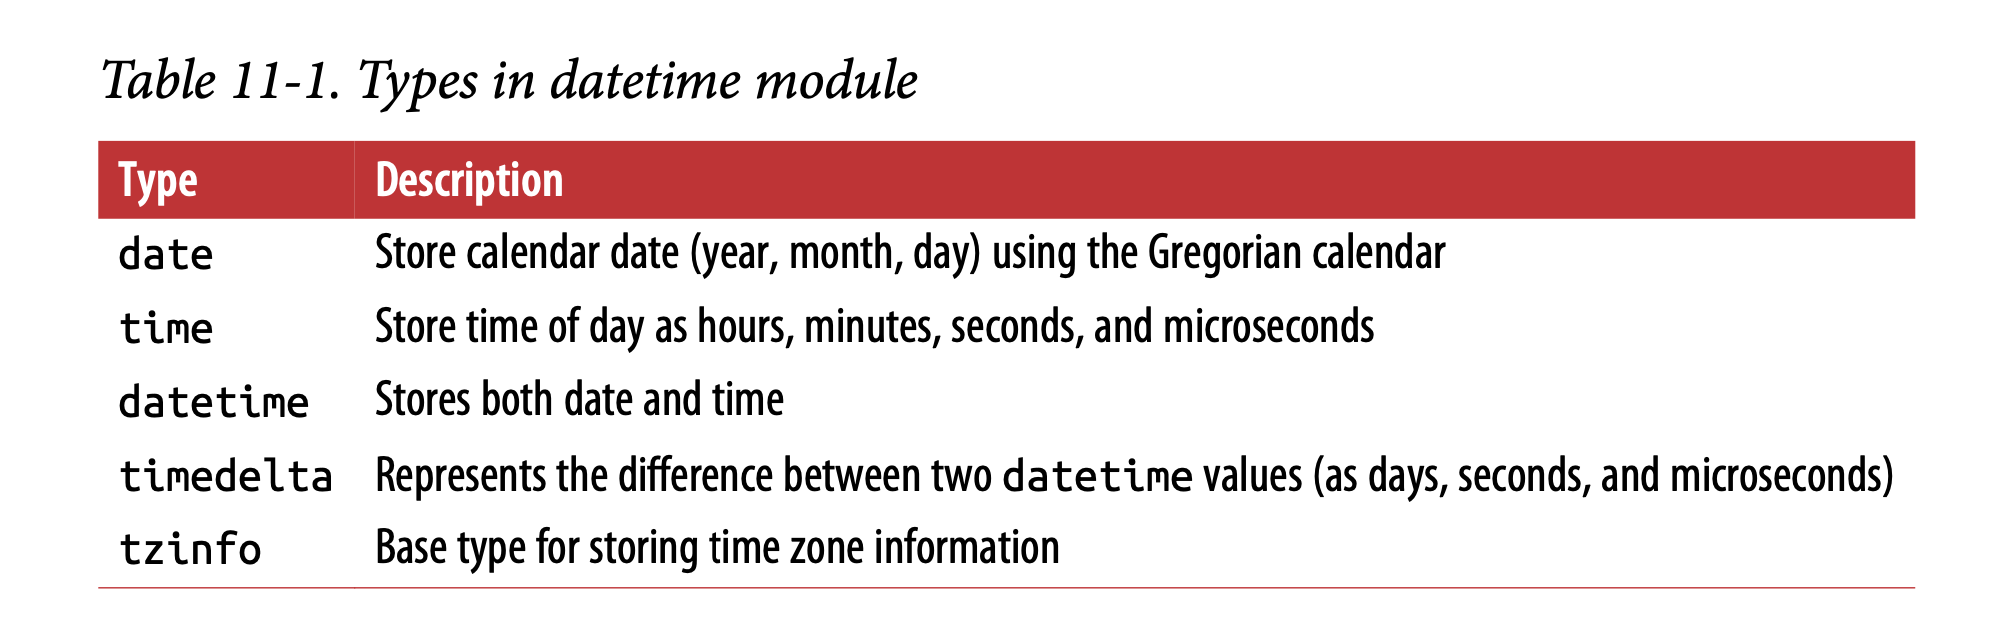

Converting between datetime and String

In [16]:
stamp= datetime(2024,1,1)

str(stamp)

'2024-01-01 00:00:00'

In [19]:
stamp.strftime('%Y-%m-%d')

'2024-01-01'

In [24]:
datetime.now().strftime('%Y-%M-%D') # M is for minute , D is invalid

'03/16/24'

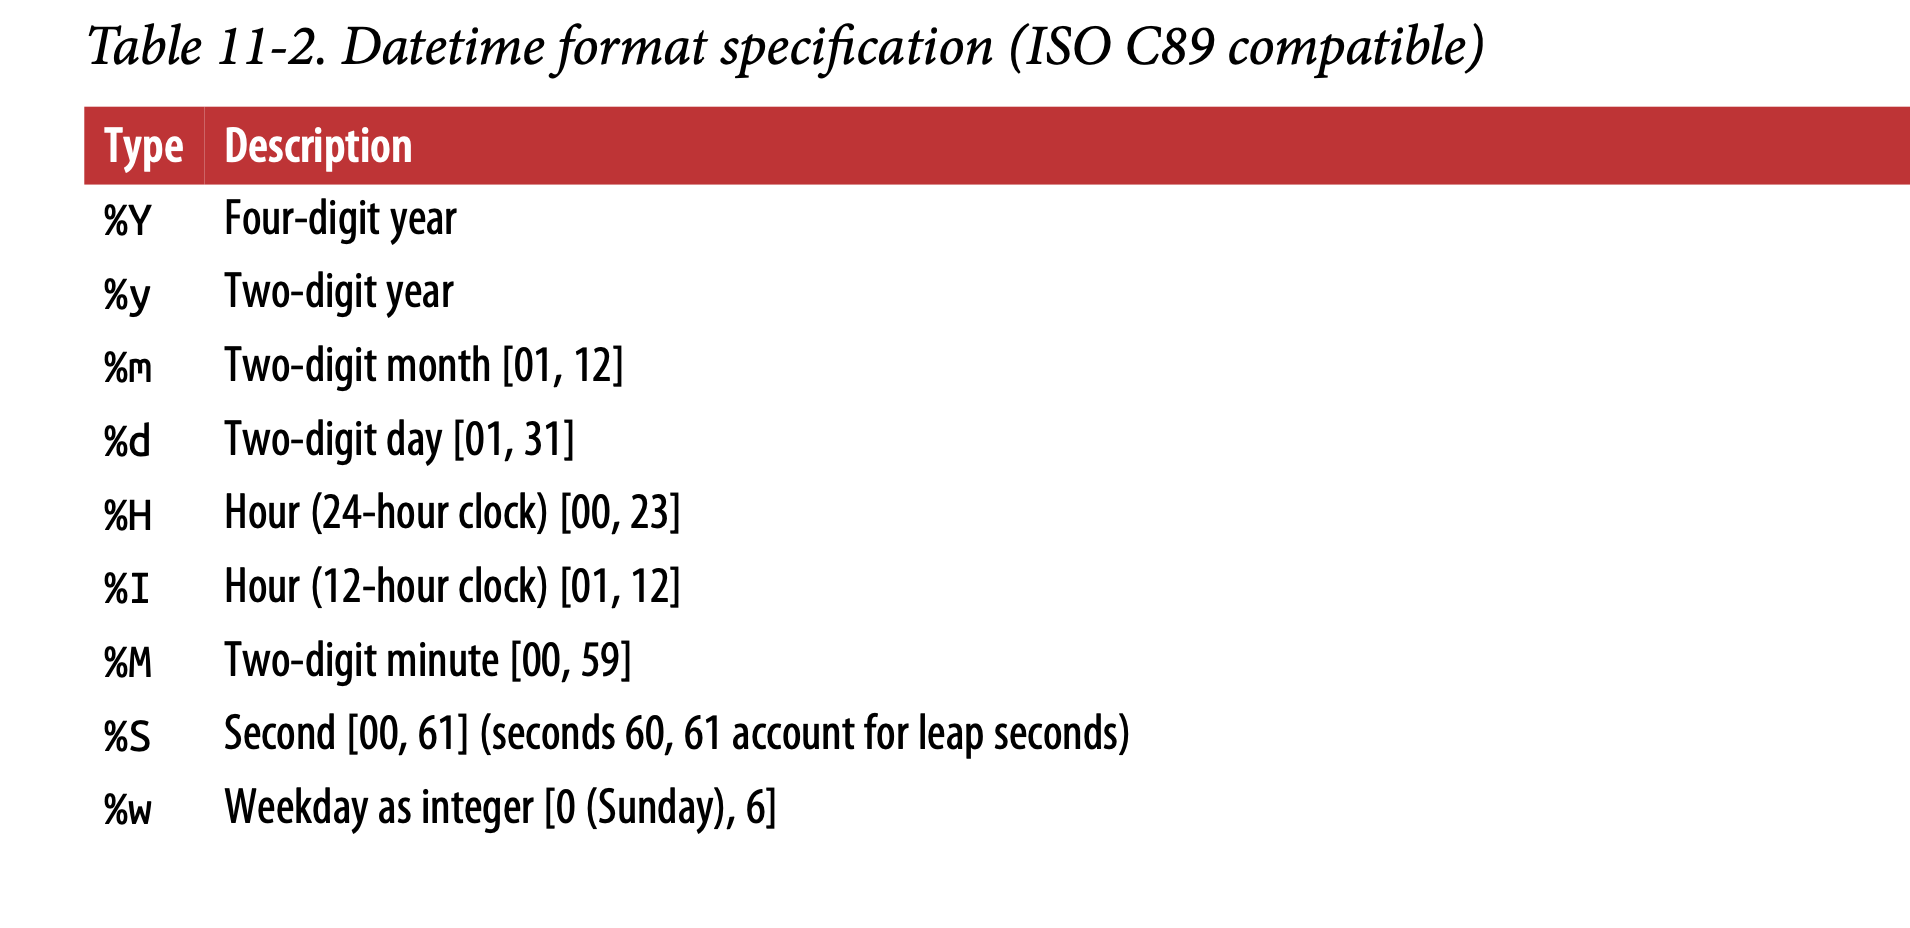

In [25]:
datetime.now().strftime('%F')

'2024-03-16'

In [26]:
datetime.now().strftime('%D')

'03/16/24'

In [ ]:
# Shortcuts

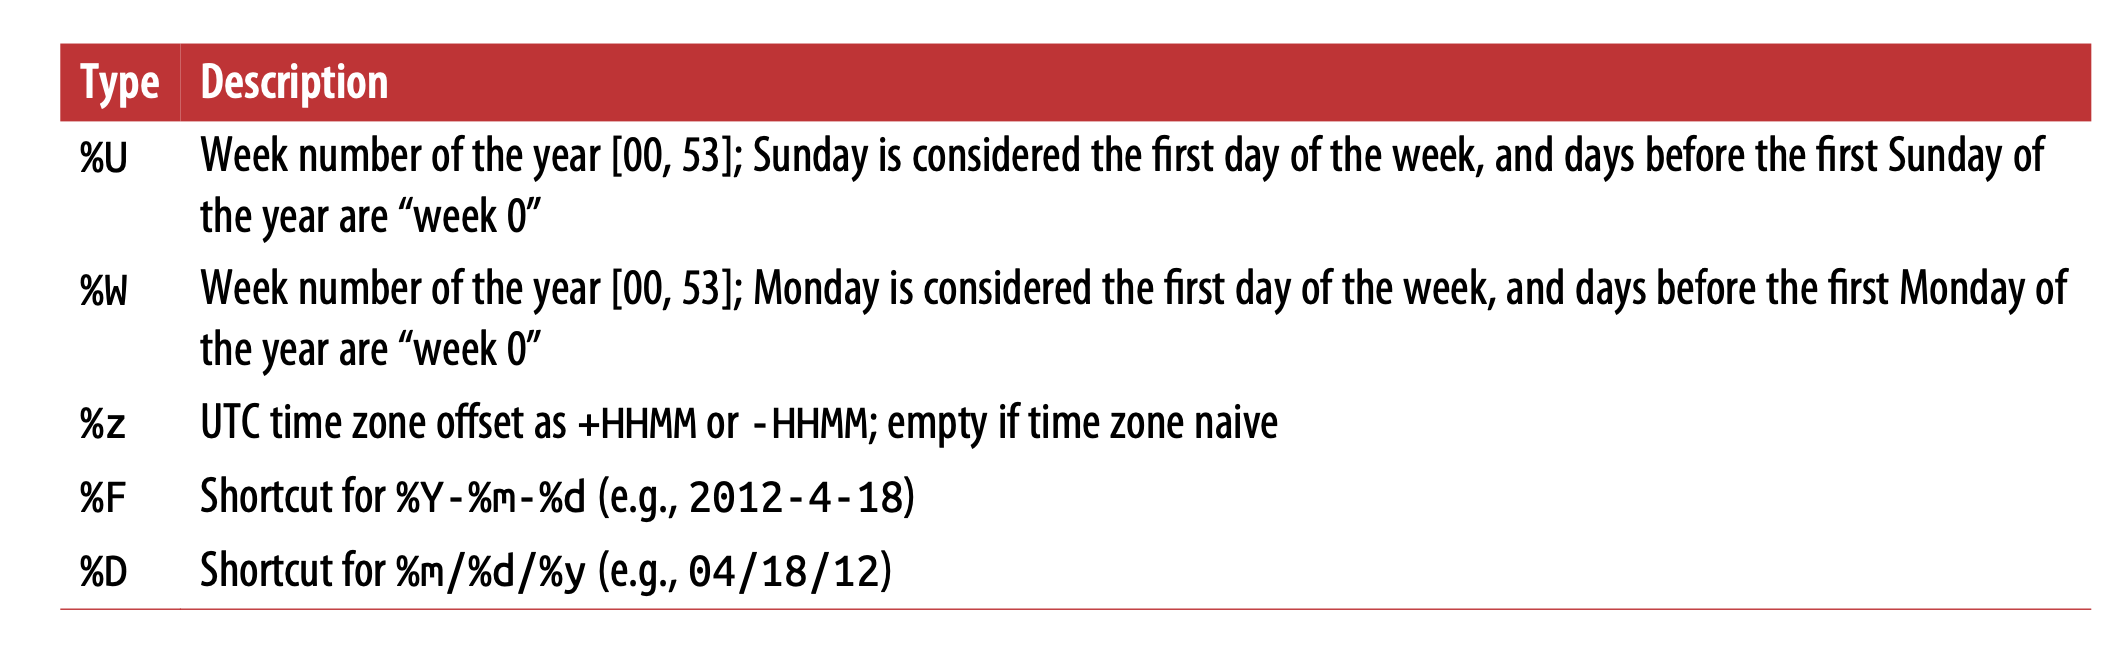

In [31]:
value= '2023-01-01'
datetime.strptime(value,'%Y-%m-%d')  # '%Y-%m-%d' has to match the original value to be converted

datetime.datetime(2023, 1, 1, 0, 0)

In [32]:
datestrs =  ['7/6/2011', '8/6/2011']

In [34]:
[datetime.strptime(date, '%m/%d/%Y') for date in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime is a good way to parse a date with a known format.\
However, it can be a bit annoying to have to write a format spec each time, especially for common date formats.\
In this case, you can use the parser.parse method in the third-party dateutil package (this is installed automatically when you install pandas):

In [35]:
from dateutil.parser import parse

In [36]:
[parse(date) for date in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [37]:
parse('6/11/2023', dayfirst=True)

datetime.datetime(2023, 11, 6, 0, 0)

In [38]:
#pd.to_datetime is very flexible

In [41]:
import pandas as pd

In [42]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [44]:
idx=pd.to_datetime(datestrs+ [None])

In [45]:
pd.isna(idx)

array([False, False,  True])

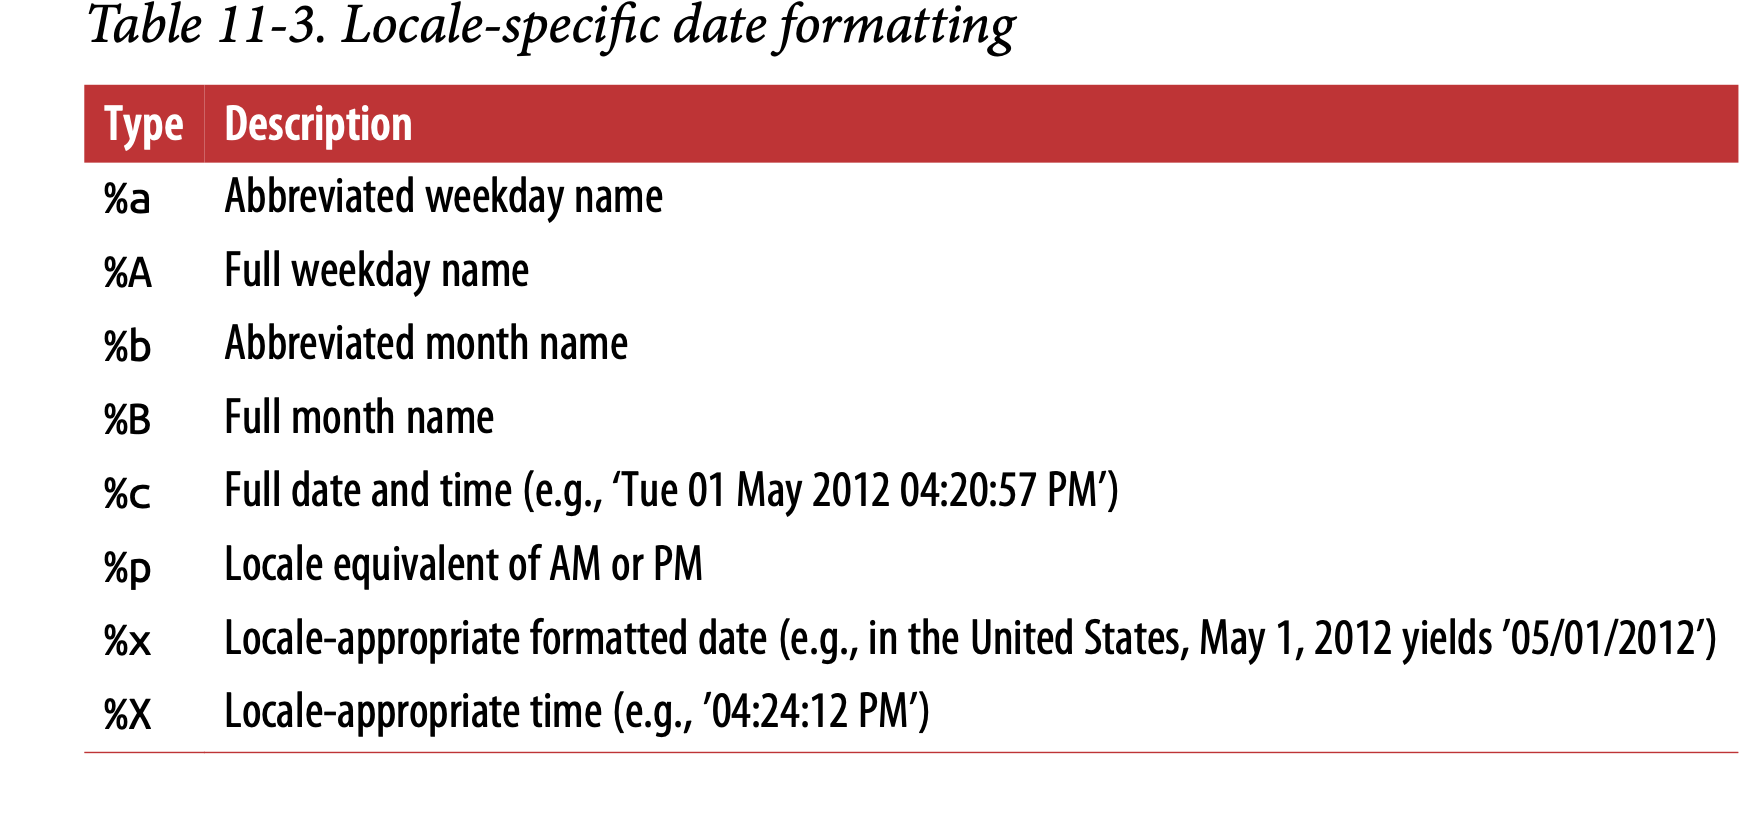

In [46]:
# dateutil.parser is an imperfect tool

TImeSeries Basics

In [57]:
from datetime import datetime
import numpy as np

dates= [datetime(2021,1,1), datetime(2021,1,5), datetime(2021,1,9), datetime(2011, 1, 8),
           datetime(2011, 1, 10), datetime(2011, 1, 12) ]

ts= pd.DataFrame(np.random.randn(6), index= dates,)
ts

,0
2021-01-01,-0.085897
2021-01-05,1.074258
2021-01-09,1.340753
2011-01-08,-1.507850
2011-01-10,0.452287
2011-01-12,0.235483


In [58]:
ts.index.name= 'Date'
ts.index

DatetimeIndex(['2021-01-01', '2021-01-05', '2021-01-09', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [61]:
ts+ts[::2]

,0
Date,
2011-01-08,NaN
2011-01-10,0.904574
2011-01-12,NaN
2021-01-01,-0.171793
2021-01-05,NaN
2021-01-09,2.681506


In [62]:
ts.index.dtype

dtype('<M8[ns]')

In [63]:
ts.index[0]

Timestamp('2021-01-01 00:00:00')

Indexing, Selection and Subsetting

In [68]:
stamp= ts.index[2]
stamp

Timestamp('2021-01-09 00:00:00')

In [76]:
ts[ts.index== stamp], # ts[stamp] isn't working because ts is not a series here

,0
Date,
2021-01-09,1.340753


In [12]:
from datetime import datetime

In [13]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
     datetime(2011, 1, 7), datetime(2011, 1, 8),
     datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [83]:
ts[ts.index[0]]

0.03097334694804695

In [84]:
ts['1/10/2011']

0.27309187628524345

In [4]:
import pandas as pd
import numpy as np

In [5]:
longer_ts = pd.Series(np.random.rand(1000), index= pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.359778
2000-01-02    0.638449
2000-01-03    0.458956
2000-01-04    0.333665
2000-01-05    0.182103
                ...   
2002-09-22    0.194323
2002-09-23    0.709589
2002-09-24    0.670072
2002-09-25    0.152514
2002-09-26    0.229736
Freq: D, Length: 1000, dtype: float64

In [8]:
longer_ts['2001']

2001-01-01    0.648496
2001-01-02    0.112439
2001-01-03    0.925303
2001-01-04    0.260048
2001-01-05    0.387116
                ...   
2001-12-27    0.742188
2001-12-28    0.840377
2001-12-29    0.269457
2001-12-30    0.139525
2001-12-31    0.902607
Freq: D, Length: 365, dtype: float64

In [9]:
longer_ts['2001-5']

2001-05-01    0.392764
2001-05-02    0.262568
2001-05-03    0.565524
2001-05-04    0.460904
2001-05-05    0.581276
2001-05-06    0.574609
2001-05-07    0.645046
2001-05-08    0.605875
2001-05-09    0.014169
2001-05-10    0.003999
2001-05-11    0.416487
2001-05-12    0.724387
2001-05-13    0.778132
2001-05-14    0.310570
2001-05-15    0.812193
2001-05-16    0.785908
2001-05-17    0.109340
2001-05-18    0.120273
2001-05-19    0.228953
2001-05-20    0.432091
2001-05-21    0.974231
2001-05-22    0.447527
2001-05-23    0.998699
2001-05-24    0.962067
2001-05-25    0.088701
2001-05-26    0.799619
2001-05-27    0.771407
2001-05-28    0.029709
2001-05-29    0.631593
2001-05-30    0.192831
2001-05-31    0.383161
Freq: D, dtype: float64

In [14]:
ts[datetime(2011,1,7):]

2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [15]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
dtype: float64

As before, you can pass either a string date, datetime, or timestamp.\
Remember that slicing in this manner produces views on the source time series like slicing NumPy arrays.\
This means that no data is copied and modifications on the slice will be reflec‐ ted in the original data.

In [16]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
dtype: float64

In [19]:
dates= pd.date_range('1/1/2000', periods=100, freq='W-SAT')
dates

DatetimeIndex(['2000-01-01', '2000-01-08', '2000-01-15', '2000-01-22',
               '2000-01-29', '2000-02-05', '2000-02-12', '2000-02-19',
               '2000-02-26', '2000-03-04', '2000-03-11', '2000-03-18',
               '2000-03-25', '2000-04-01', '2000-04-08', '2000-04-15',
               '2000-04-22', '2000-04-29', '2000-05-06', '2000-05-13',
               '2000-05-20', '2000-05-27', '2000-06-03', '2000-06-10',
               '2000-06-17', '2000-06-24', '2000-07-01', '2000-07-08',
               '2000-07-15', '2000-07-22', '2000-07-29', '2000-08-05',
               '2000-08-12', '2000-08-19', '2000-08-26', '2000-09-02',
               '2000-09-09', '2000-09-16', '2000-09-23', '2000-09-30',
               '2000-10-07', '2000-10-14', '2000-10-21', '2000-10-28',
               '2000-11-04', '2000-11-11', '2000-11-18', '2000-11-25',
               '2000-12-02', '2000-12-09', '2000-12-16', '2000-12-23',
               '2000-12-30', '2001-01-06', '2001-01-13', '2001-01-20',
      

In [20]:
long_df= pd.DataFrame(np.random.randn(100,4), columns=['a','b','c','d'], index=dates)

In [24]:
long_df.loc['2000-05-05'] #key error when value is nopt found

KeyError: '2000-05-05'

In [25]:
long_df.loc['2000-05-05':]

,a,b,c,d
2000-05-06,1.463765,0.401366,1.500104,-0.995242
2000-05-13,1.851727,-0.674718,0.946216,0.594915
2000-05-20,0.430122,-0.193967,-0.444590,-1.014311
2000-05-27,-0.337383,-1.147030,0.558976,1.336545
2000-06-03,-0.995045,0.002612,-1.018818,-0.940985
...,...,...,...,...
2001-10-27,0.501694,-0.835294,0.405388,0.939665
2001-11-03,-1.176917,2.012682,-0.148563,1.417264
2001-11-10,0.515430,0.700377,-0.531331,-0.233709
2001-11-17,-1.884253,0.708341,1.585795,-0.507890


Time Series with Duplicate Indices

In [26]:
dates= pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                        '1/2/2000', '1/3/2000'])

In [27]:
dup_ts= pd.Series(np.arange(5), index=dates)

In [28]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [30]:
dup_ts.index.is_unique

False

In [31]:
dup_ts.groupby(dup_ts.index).sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

In [32]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [35]:
dup_ts.groupby(level = 0 ).sum() #level=0: Groups the DataFrame based on the unique values in the first level of the index.


2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. \
For many applications this is sufficient. However, \
it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes,\
 even if that means introducing missing values into a time series. Fortunately pandas has a full suite of standard time series frequencies \
 and tools for resampling, inferring fre‐ quencies, and generating fixed-frequency date ranges.\ For example, you can convert the sample time \
 series to be fixed daily frequency by calling resample:

In [36]:
ts

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [37]:
ts

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [42]:
resampler= ts.resample('D') #later on these

Generating Date Ranges

In [50]:
from datetime import timedelta

In [53]:
index= pd.date_range('2022-01-01', datetime.now()-timedelta(days=1), freq='M')

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_678/4108868930.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index= pd.date_range('2022-01-01', datetime.now()-timedelta(days=1), freq='M')


In [54]:
index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29'],
              dtype='datetime64[ns]', freq='ME')

In [55]:
index= pd.date_range('2022-01-01', datetime.now()-timedelta(days=1), freq='D')

In [69]:
index= pd.date_range(start='2022-01-01', end=(datetime.now()-timedelta(days=1)), periods=20)

In [70]:
index

DatetimeIndex([          '2022-01-01 00:00:00',
               '2022-02-12 08:20:57.562538894',
               '2022-03-26 16:41:55.125077789',
               '2022-05-08 01:02:52.687616684',
               '2022-06-19 09:23:50.250155578',
               '2022-07-31 17:44:47.812694472',
               '2022-09-12 02:05:45.375233368',
               '2022-10-24 10:26:42.937772260',
               '2022-12-05 18:47:40.500311156',
               '2023-01-17 03:08:38.062850052',
               '2023-02-28 11:29:35.625388944',
               '2023-04-11 19:50:33.187927840',
               '2023-05-24 04:11:30.750466736',
               '2023-07-05 12:32:28.313005632',
               '2023-08-16 20:53:25.875544520',
               '2023-09-28 05:14:23.438083416',
               '2023-11-09 13:35:21.000622312',
               '2023-12-21 21:56:18.563161208',
               '2024-02-02 06:17:16.125700104',
                  '2024-03-15 14:38:13.688239'],
              dtype='datetime64[ns]', f

In [79]:
index= pd.date_range(start='2022-01-01', end= '2022-01-21', periods=20, normalize=True) #normalize doesn't work here
index

DatetimeIndex([          '2022-01-01 00:00:00',
               '2022-01-02 01:15:47.368421052',
               '2022-01-03 02:31:34.736842105',
               '2022-01-04 03:47:22.105263157',
               '2022-01-05 05:03:09.473684210',
               '2022-01-06 06:18:56.842105263',
               '2022-01-07 07:34:44.210526315',
               '2022-01-08 08:50:31.578947368',
               '2022-01-09 10:06:18.947368421',
               '2022-01-10 11:22:06.315789473',
               '2022-01-11 12:37:53.684210526',
               '2022-01-12 13:53:41.052631578',
               '2022-01-13 15:09:28.421052631',
               '2022-01-14 16:25:15.789473684',
               '2022-01-15 17:41:03.157894736',
               '2022-01-16 18:56:50.526315789',
               '2022-01-17 20:12:37.894736842',
               '2022-01-18 21:28:25.263157894',
               '2022-01-19 22:44:12.631578947',
                         '2022-01-21 00:00:00'],
              dtype='datetime64[ns]', f

In [75]:
index= pd.date_range(start='2022-01-01', periods=20)
index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')

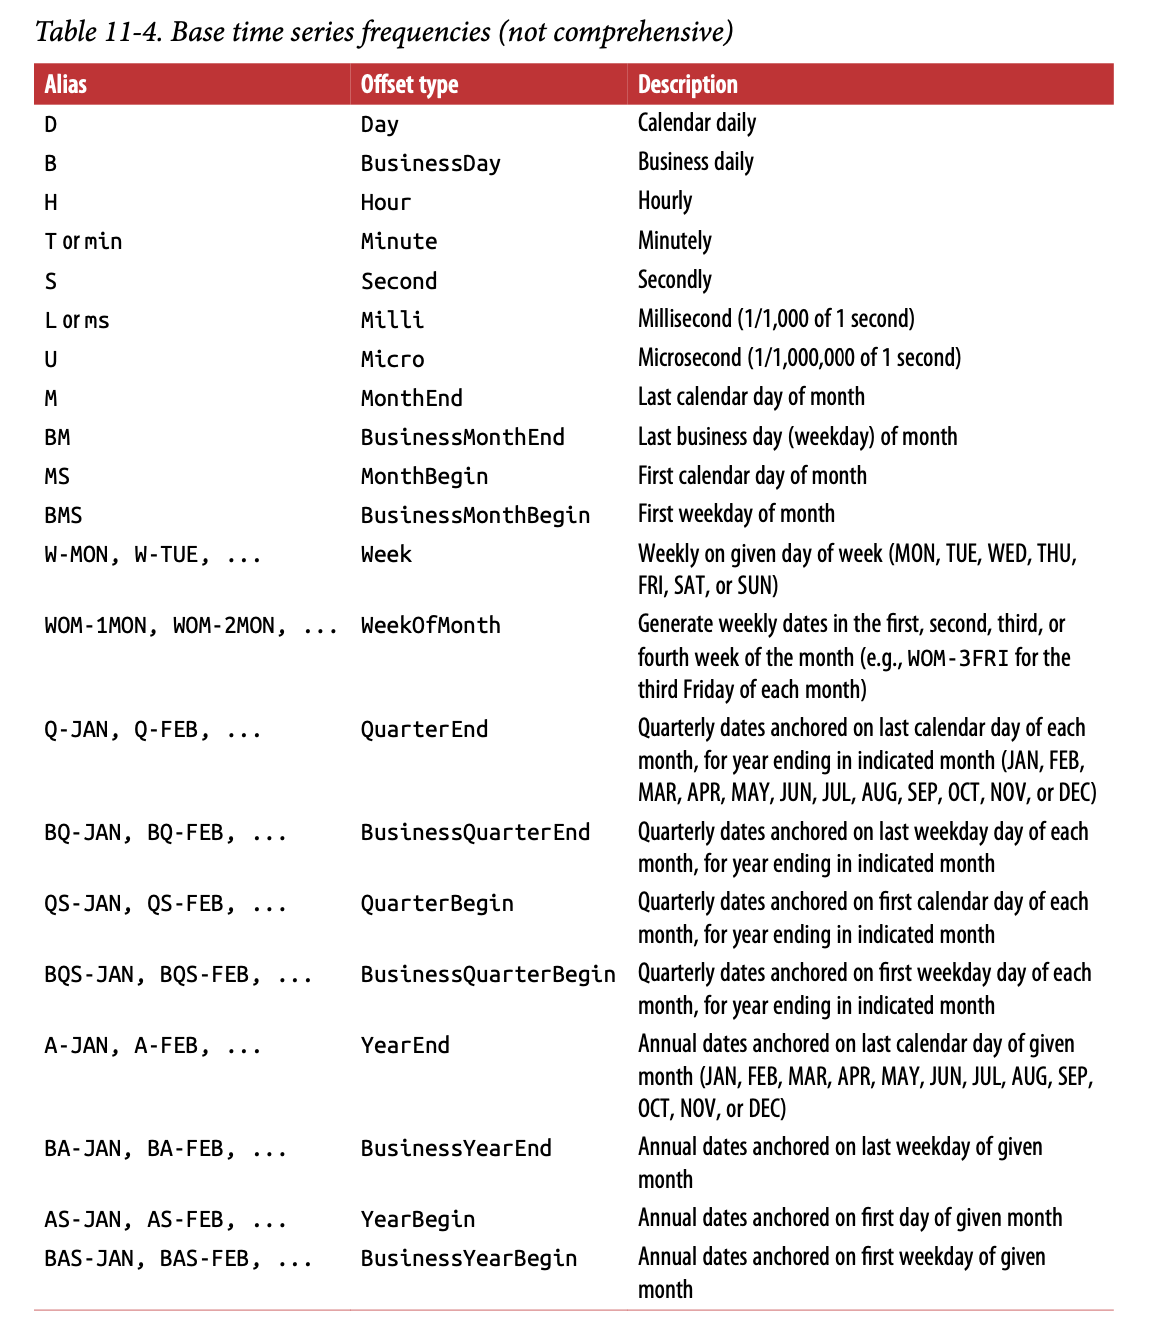

In [82]:
#frequencies above
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) #removes the time part

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range('2012-05-02 12:56:31', periods=5,) #preserves the timne part

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')